In [2]:
%matplotlib inline

import gym
import matplotlib
import numpy as np
import sys

from collections import defaultdict

if "../" not in sys.path:
  sys.path.append("../") 
from lib.envs.blackjack import BlackjackEnv
from lib import plotting

matplotlib.style.use('ggplot')

In [3]:
env = BlackjackEnv()

In [75]:
def mc_prediction(policy, env, num_episodes, discount_factor=1.0):
    """
    Monte Carlo prediction algorithm. Calculates the value function
    for a given policy using sampling.
    
    Args:
        policy: A function that maps an observation to action probabilities.
        env: OpenAI gym environment.
        num_episodes: Number of episodes to sample.
        discount_factor: Gamma discount factor.
    
    Returns:
        A dictionary that maps from state -> value.
        The state is a tuple and the value is a float.
    """

    # Keeps track of sum and count of returns for each state
    # to calculate an average. We could use an array to save all
    # returns (like in the book) but that's memory inefficient.
    returns_sum = defaultdict(float)
    returns_count = defaultdict(float)
    
    # The final value function
    V = defaultdict(float)
    
    for _ in range(num_episodes):
        state = env.reset()
        # Generate an episode
        episode = []
        for t in range(100):
            action = policy(state)
            next_state, reward, done, _ = env.step(action)
            episode.append([state, action, reward])
            
            if done: 
                break
            state = next_state
            
        G = 0
        states = [x[0] for x in episode]
#         # First-Visit MC
#         for s in states:
#             first_occur_id = next(i for i in range(len(episode)) if episode[i][0] == s)
#             G = sum([x[2]*(discount_factor**i) for i, x in enumerate(episode[first_occur_id:])])
#             returns_sum[s] += G
#             returns_count[s] += 1.0
#             V[s] = returns_sum[s] / returns_count[s]
        
        for s in states:
            first_occur = states.index(s)
            G = sum([x[2]*(discount_factor**i) for i, x in enumerate(episode[first_occur:])])
            returns_sum[state] += G
            returns_count[state] += 1.0

            V[state] = returns_sum[state] / returns_count[state]
            
    return V    

In [76]:
def sample_policy(observation):
    """
    A policy that sticks if the player score is > 20 and hits otherwise.
    """
    score, dealer_score, usable_ace = observation
    return 0 if score >= 20 else 1

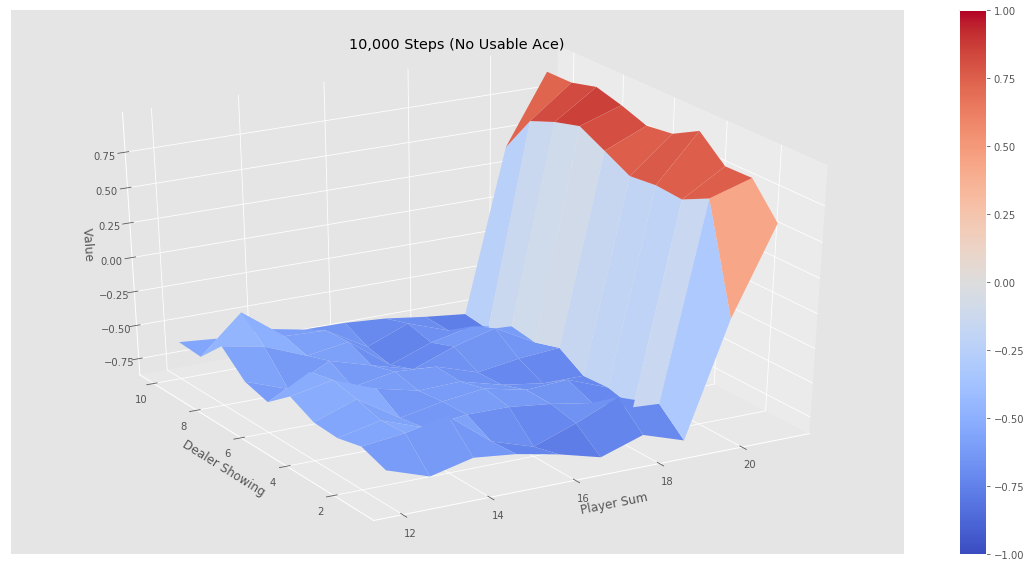

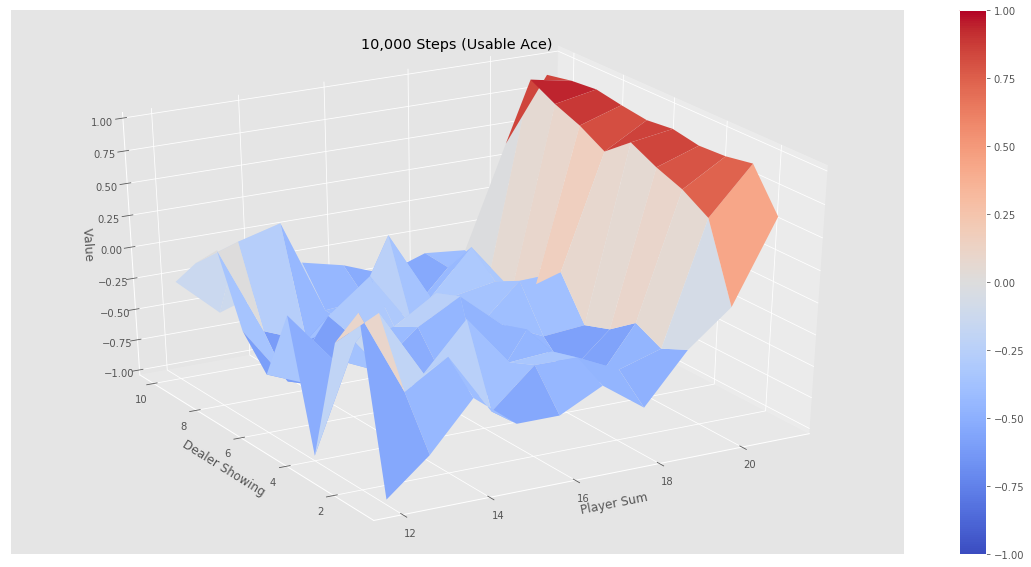

In [ ]:
V_10k = mc_prediction(sample_policy, env, num_episodes=10000)
plotting.plot_value_function(V_10k, title="10,000 Steps")

V_500k = mc_prediction(sample_policy, env, num_episodes=500000)
plotting.plot_value_function(V_500k, title="500,000 Steps")